In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
electricity_data = pd.read_csv("/work/electricity_data.csv")
electricity_data.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,RESIDENTIAL,Unnamed: 5,Unnamed: 6,Unnamed: 7,COMMERCIAL,Unnamed: 9,...,Unnamed: 14,Unnamed: 15,TRANSPORTATION,Unnamed: 17,Unnamed: 18,Unnamed: 19,TOTAL,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,NaN,NaN,NaN,NaN,Revenue,Sales,Customers,Price,Revenue,Sales,...,Customers,Price,Revenue,Sales,Customers,Price,Revenue,Sales,Customers,Price
1,Year,Month,State,Data Status,Thousand Dollars,Megawatthours,Count,Cents/kWh,Thousand Dollars,Megawatthours,...,Count,Cents/kWh,Thousand Dollars,Megawatthours,Count,Cents/kWh,Thousand Dollars,Megawatthours,Count,Cents/kWh
2,2023,12,AK,Preliminary,"52,149","211,109","298,426",24.70,"51,678","235,161",...,"1,183",20.64,0,0,0,0.00,"128,528","565,941","357,119",22.71
3,2023,12,AL,Preliminary,"380,912","2,695,514","2,369,040",14.13,"226,237","1,706,745",...,"7,209",6.82,0,0,0,0.00,"784,137","6,997,082","2,757,183",11.21
4,2023,12,AR,Preliminary,"174,050","1,498,697","1,472,351",11.61,"90,667","893,974",...,"35,665",6.40,3,20,2,15.14,"363,763","3,939,326","1,716,362",9.23
5,2023,12,AZ,Preliminary,"346,287","2,403,660","3,070,519",14.41,"273,930","2,374,397",...,"7,074",7.69,73,778,2,9.38,"709,440","5,938,688","3,421,250",11.95
6,2023,12,CA,Preliminary,"1,908,168","6,554,619","14,078,011",29.11,"1,995,356","8,794,973",...,"146,857",18.19,"6,707","51,269",12,13.08,"4,484,754","18,560,066","15,989,356",24.16
7,2023,12,CO,Preliminary,"246,107","1,739,452","2,472,310",14.15,"189,204","1,736,464",...,"14,778",8.21,756,"7,896",1,9.57,"541,602","4,769,468","2,881,151",11.36
8,2023,12,CT,Preliminary,"311,177","1,158,563","1,543,452",26.86,"179,109","913,000",...,"3,867",16.16,"3,391","17,764",3,19.09,"524,227","2,278,379","1,704,435",23.01
9,2023,12,DC,Preliminary,"33,203","187,079","315,555",17.75,"96,404","546,452",...,1,10.93,"2,248","21,265",3,10.57,"133,591","770,669","342,952",17.33


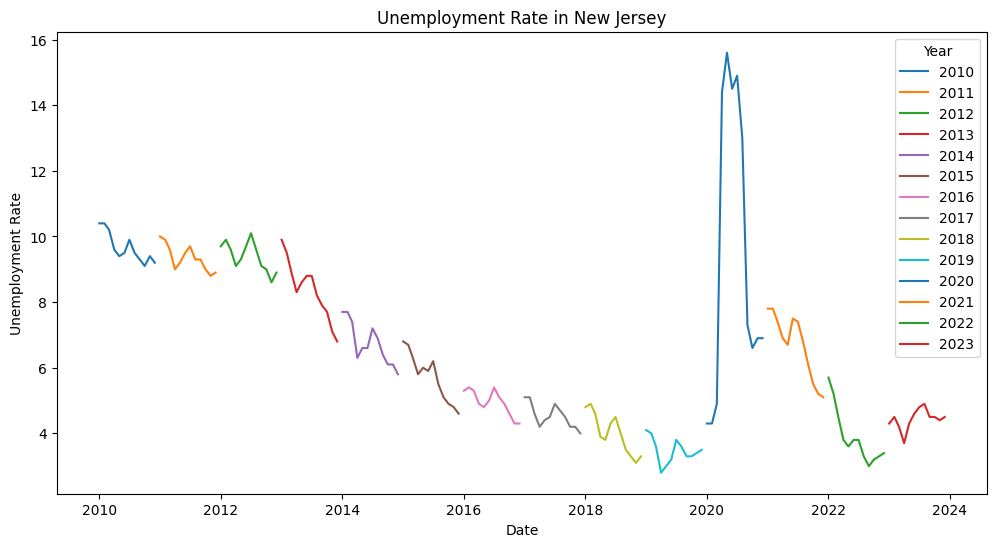

In [ ]:
nj_unemp = pd.read_csv("NJURN.csv")
nj_unemp.head()
nj_unemp['Date'] = pd.to_datetime(nj_unemp["DATE"])
nj_unemp["Year"] = nj_unemp["Date"].dt.year
plt.figure(figsize = (12, 6))
for year, group in nj_unemp.groupby("Year"):
    plt.plot(group["Date"], group["NJURN"], label = year)
plt.title('Unemployment Rate in New Jersey')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.legend(title='Year')
plt.show()

In [ ]:
#cleaning up electricity data format
electricity_data.columns = electricity_data.iloc[1]
electricity_data = electricity_data.drop([0,1])
electricity_data

1,Year,Month,State,Data Status,Thousand Dollars,Megawatthours,Count,Cents/kWh,Thousand Dollars,Megawatthours,...,Count,Cents/kWh,Thousand Dollars,Megawatthours,Count,Cents/kWh,Thousand Dollars,Megawatthours,Count,Cents/kWh
2,2023,12,AK,Preliminary,"52,149","211,109","298,426",24.70,"51,678","235,161",...,"1,183",20.64,0,0,0,0.00,"128,528","565,941","357,119",22.71
3,2023,12,AL,Preliminary,"380,912","2,695,514","2,369,040",14.13,"226,237","1,706,745",...,"7,209",6.82,0,0,0,0.00,"784,137","6,997,082","2,757,183",11.21
4,2023,12,AR,Preliminary,"174,050","1,498,697","1,472,351",11.61,"90,667","893,974",...,"35,665",6.40,3,20,2,15.14,"363,763","3,939,326","1,716,362",9.23
5,2023,12,AZ,Preliminary,"346,287","2,403,660","3,070,519",14.41,"273,930","2,374,397",...,"7,074",7.69,73,778,2,9.38,"709,440","5,938,688","3,421,250",11.95
6,2023,12,CA,Preliminary,"1,908,168","6,554,619","14,078,011",29.11,"1,995,356","8,794,973",...,"146,857",18.19,"6,707","51,269",12,13.08,"4,484,754","18,560,066","15,989,356",24.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8566,2010,1,WA,Final,"320,087","4,160,946","2,812,518",7.69,"182,753","2,544,235",...,"24,640",4.02,38,530,7,7.17,"589,359","8,854,879","3,189,468",6.66
8567,2010,1,WI,Final,"275,175","2,298,172","2,596,588",11.97,"188,311","1,960,624",...,"4,032",6.51,0,0,0,0.00,"582,875","6,091,810","2,939,430",9.57
8568,2010,1,WV,Final,"128,620","1,567,536","868,434",8.21,"49,910","688,972",...,"12,251",5.71,34,348,1,9.77,"230,215","3,161,342","1,017,686",7.28
8569,2010,1,WY,Final,"27,801","345,944","257,183",8.04,"26,282","372,045",...,"8,630",4.91,0,0,0,0.00,"96,349","1,578,332","325,287",6.10


In [ ]:
# get residential data 
electricty_residential = electricity_data.iloc[:, :8]
electricty_residential.head(5)

# get new jersey residential data
elect_residential_nj = electricty_residential[electricty_residential['State'] == 'NJ']
elect_residential_nj.head(5)

1,Year,Month,State,Data Status,Thousand Dollars,Megawatthours,Count,Cents/kWh
33,2023,12,NJ,Preliminary,"402,447","2,288,286","3,719,353",17.59
84,2023,11,NJ,Preliminary,"342,440","1,953,211","3,714,396",17.53
135,2023,10,NJ,Preliminary,"328,766","1,878,707","3,706,181",17.50
186,2023,9,NJ,Preliminary,"466,944","2,592,379","3,703,413",18.01
237,2023,8,NJ,Preliminary,"606,648","3,278,331","3,714,448",18.50


In [ ]:
# Additional Clean Up
elect_residential_nj['Month'] = pd.to_numeric(elect_residential_nj['Month'])
elect_residential_nj['Year'] = pd.to_numeric(elect_residential_nj['Year'])
elect_residential_nj['Megawatthours'] = pd.to_numeric(elect_residential_nj['Megawatthours'].str.replace(',', ''))

/tmp/ipykernel_121/1329413030.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elect_residential_nj['Month'] = pd.to_numeric(elect_residential_nj['Month'])
/tmp/ipykernel_121/1329413030.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elect_residential_nj['Year'] = pd.to_numeric(elect_residential_nj['Year'])
/tmp/ipykernel_121/1329413030.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

/tmp/ipykernel_121/1341009657.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elect_residential_nj['Season'] = elect_residential_nj['Month'].map(mapping)


Text(0.5, 1.0, 'Average Electricity Consumed per Season per Year')

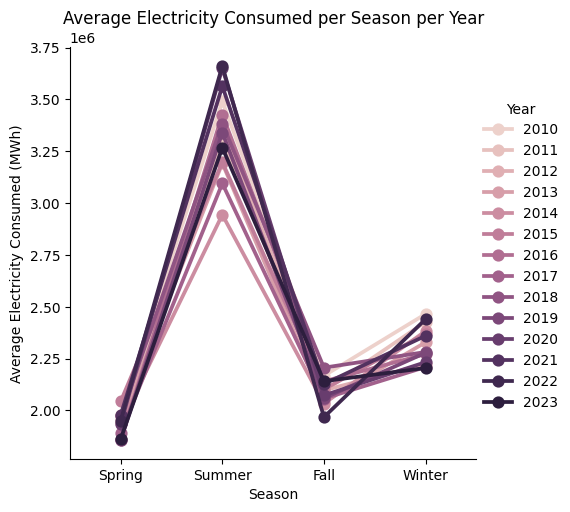

In [ ]:
#map months to seasons
mapping = {1:'Winter', 2:'Winter', 12:'Winter', 9:'Fall', 10:'Fall', 11:'Fall', 6:'Summer', 7:'Summer', 8:'Summer', 3:'Spring', 4:'Spring', 5:'Spring'}
elect_residential_nj['Season'] = elect_residential_nj['Month'].map(mapping)
elect_season_yr = elect_residential_nj[['Year', 'Season', 'Megawatthours']].groupby(['Year', 'Season']).mean()

sns.catplot(data=elect_season_yr, x='Season', y='Megawatthours', hue='Year', kind='point', \
            order=['Spring', 'Summer', 'Fall', 'Winter'], legend='full')
plt.ylabel('Average Electricity Consumed (MWh)')
plt.title('Average Electricity Consumed per Season per Year')

In [ ]:
elect_residential_nj

1,Year,Month,State,Data Status,Thousand Dollars,Megawatthours,Count,Cents/kWh,Season
33,2023,12,NJ,Preliminary,"402,447",2288286,"3,719,353",17.59,Winter
84,2023,11,NJ,Preliminary,"342,440",1953211,"3,714,396",17.53,Fall
135,2023,10,NJ,Preliminary,"328,766",1878707,"3,706,181",17.50,Fall
186,2023,9,NJ,Preliminary,"466,944",2592379,"3,703,413",18.01,Fall
237,2023,8,NJ,Preliminary,"606,648",3278331,"3,714,448",18.50,Summer
...,...,...,...,...,...,...,...,...,...
8346,2010,5,NJ,Final,"336,138",2082045,"3,470,153",16.14,Spring
8397,2010,4,NJ,Final,"286,591",1801444,"3,454,839",15.91,Spring
8448,2010,3,NJ,Final,"326,187",2052907,"3,453,226",15.89,Spring
8499,2010,2,NJ,Final,"353,691",2236726,"3,444,726",15.81,Winter


In [ ]:
nj_unemp

,DATE,NJURN,Date,Year
0,2010-01-01,10.4,2010-01-01,2010
1,2010-02-01,10.4,2010-02-01,2010
2,2010-03-01,10.2,2010-03-01,2010
3,2010-04-01,9.6,2010-04-01,2010
4,2010-05-01,9.4,2010-05-01,2010
...,...,...,...,...
163,2023-08-01,4.9,2023-08-01,2023
164,2023-09-01,4.5,2023-09-01,2023
165,2023-10-01,4.5,2023-10-01,2023
166,2023-11-01,4.4,2023-11-01,2023


In [ ]:
weather = pd.read_csv("nj_weather.csv")
weather

,STATION,NAME,DATE,AWND,CLDD,DSNW,HTDD,PRCP,SNOW,TAVG,TMAX,TMIN,TSUN
0,USW00014734,"NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US",2010-01,10.7,0,1,1010,1.67,1.7,32.4,39.8,25.1,NaN
1,USW00014734,"NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US",2010-02,11.6,0,5,889,5.48,32.9,33.2,39.3,27.2,NaN
2,USW00014734,"NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US",2010-03,11.2,0,0,520,10.09,0.0,48.2,56.5,40.0,NaN
3,USW00014734,"NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US",2010-04,9.2,27,0,241,2.91,0.0,57.9,68.5,47.2,NaN
4,USW00014734,"NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US",2010-05,9.2,127,0,89,3.48,0.0,66.2,76.4,56.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,USW00014734,"NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US",2023-08,8.5,362,0,0,4.26,0.0,76.7,84.5,68.8,NaN
164,USW00014734,"NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US",2023-09,9.2,212,0,26,8.31,0.0,71.2,78.9,63.5,NaN
165,USW00014734,"NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US",2023-10,8.1,53,0,148,4.02,0.0,62.0,70.6,53.3,NaN
166,USW00014734,"NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US",2023-11,9.2,0,0,551,2.91,0.0,46.7,55.7,37.6,NaN


In [ ]:
# standardize date format
elect_residential_nj['Month'] = elect_residential_nj['Month'].astype(str).str.zfill(2)
elect_residential_nj['Year-Month'] = elect_residential_nj['Year'].astype(str) + '-' + elect_residential_nj['Month'].astype(str)
elect_residential_nj

/tmp/ipykernel_121/685804431.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elect_residential_nj['Month'] = elect_residential_nj['Month'].astype(str).str.zfill(2)
/tmp/ipykernel_121/685804431.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elect_residential_nj['Year-Month'] = elect_residential_nj['Year'].astype(str) + '-' + elect_residential_nj['Month'].astype(str)


1,Year,Month,State,Data Status,Thousand Dollars,Megawatthours,Count,Cents/kWh,Season,Year-Month
33,2023,12,NJ,Preliminary,"402,447",2288286,"3,719,353",17.59,Winter,2023-12
84,2023,11,NJ,Preliminary,"342,440",1953211,"3,714,396",17.53,Fall,2023-11
135,2023,10,NJ,Preliminary,"328,766",1878707,"3,706,181",17.50,Fall,2023-10
186,2023,09,NJ,Preliminary,"466,944",2592379,"3,703,413",18.01,Fall,2023-09
237,2023,08,NJ,Preliminary,"606,648",3278331,"3,714,448",18.50,Summer,2023-08
...,...,...,...,...,...,...,...,...,...,...
8346,2010,05,NJ,Final,"336,138",2082045,"3,470,153",16.14,Spring,2010-05
8397,2010,04,NJ,Final,"286,591",1801444,"3,454,839",15.91,Spring,2010-04
8448,2010,03,NJ,Final,"326,187",2052907,"3,453,226",15.89,Spring,2010-03
8499,2010,02,NJ,Final,"353,691",2236726,"3,444,726",15.81,Winter,2010-02


In [ ]:
# standardize data format and merge weather data with energy data
weather= weather.rename(columns={'DATE': 'Year-Month'})
weather_energy = pd.merge(elect_residential_nj, weather, on = "Year-Month", how='inner')
weather_energy

,Year,Month,State,Data Status,Thousand Dollars,Megawatthours,Count,Cents/kWh,Season,Year-Month,...,AWND,CLDD,DSNW,HTDD,PRCP,SNOW,TAVG,TMAX,TMIN,TSUN
0,2023,12,NJ,Preliminary,"402,447",2288286,"3,719,353",17.59,Winter,2023-12,...,8.3,0,0,641,7.56,0.0,44.3,50.8,37.9,NaN
1,2023,11,NJ,Preliminary,"342,440",1953211,"3,714,396",17.53,Fall,2023-11,...,9.2,0,0,551,2.91,0.0,46.7,55.7,37.6,NaN
2,2023,10,NJ,Preliminary,"328,766",1878707,"3,706,181",17.50,Fall,2023-10,...,8.1,53,0,148,4.02,0.0,62.0,70.6,53.3,NaN
3,2023,09,NJ,Preliminary,"466,944",2592379,"3,703,413",18.01,Fall,2023-09,...,9.2,212,0,26,8.31,0.0,71.2,78.9,63.5,NaN
4,2023,08,NJ,Preliminary,"606,648",3278331,"3,714,448",18.50,Summer,2023-08,...,8.5,362,0,0,4.26,0.0,76.7,84.5,68.8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,2010,05,NJ,Final,"336,138",2082045,"3,470,153",16.14,Spring,2010-05,...,9.2,127,0,89,3.48,0.0,66.2,76.4,56.0,NaN
164,2010,04,NJ,Final,"286,591",1801444,"3,454,839",15.91,Spring,2010-04,...,9.2,27,0,241,2.91,0.0,57.9,68.5,47.2,NaN
165,2010,03,NJ,Final,"326,187",2052907,"3,453,226",15.89,Spring,2010-03,...,11.2,0,0,520,10.09,0.0,48.2,56.5,40.0,NaN
166,2010,02,NJ,Final,"353,691",2236726,"3,444,726",15.81,Winter,2010-02,...,11.6,0,5,889,5.48,32.9,33.2,39.3,27.2,NaN


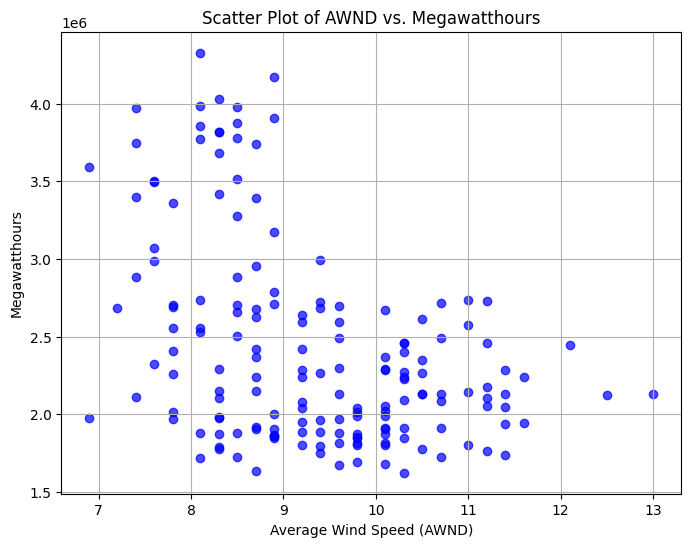

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(weather_energy['AWND'], weather_energy['Megawatthours'], color='blue', alpha=0.7)
plt.title('Scatter Plot of AWND vs. Megawatthours')
plt.xlabel('Average Wind Speed (AWND)')
plt.ylabel('Megawatthours')
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Average Temperature by Month')

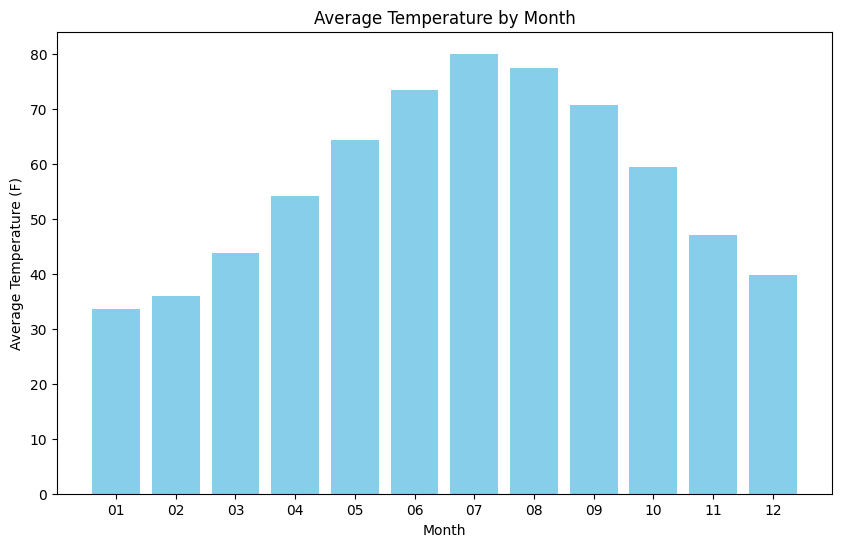

In [ ]:
grouped_df = weather_energy.groupby('Month')['TAVG'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(grouped_df['Month'], grouped_df['TAVG'], color='skyblue')

plt.xlabel('Month')
plt.ylabel('Average Temperature (F)')
plt.title('Average Temperature by Month')

In [ ]:
weather_energy

,Year,Month,State,Data Status,Thousand Dollars,Megawatthours,Count,Cents/kWh,Season,Year-Month,...,AWND,CLDD,DSNW,HTDD,PRCP,SNOW,TAVG,TMAX,TMIN,TSUN
0,2023,12,NJ,Preliminary,"402,447",2288286,"3,719,353",17.59,Winter,2023-12,...,8.3,0,0,641,7.56,0.0,44.3,50.8,37.9,NaN
1,2023,11,NJ,Preliminary,"342,440",1953211,"3,714,396",17.53,Fall,2023-11,...,9.2,0,0,551,2.91,0.0,46.7,55.7,37.6,NaN
2,2023,10,NJ,Preliminary,"328,766",1878707,"3,706,181",17.50,Fall,2023-10,...,8.1,53,0,148,4.02,0.0,62.0,70.6,53.3,NaN
3,2023,09,NJ,Preliminary,"466,944",2592379,"3,703,413",18.01,Fall,2023-09,...,9.2,212,0,26,8.31,0.0,71.2,78.9,63.5,NaN
4,2023,08,NJ,Preliminary,"606,648",3278331,"3,714,448",18.50,Summer,2023-08,...,8.5,362,0,0,4.26,0.0,76.7,84.5,68.8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,2010,05,NJ,Final,"336,138",2082045,"3,470,153",16.14,Spring,2010-05,...,9.2,127,0,89,3.48,0.0,66.2,76.4,56.0,NaN
164,2010,04,NJ,Final,"286,591",1801444,"3,454,839",15.91,Spring,2010-04,...,9.2,27,0,241,2.91,0.0,57.9,68.5,47.2,NaN
165,2010,03,NJ,Final,"326,187",2052907,"3,453,226",15.89,Spring,2010-03,...,11.2,0,0,520,10.09,0.0,48.2,56.5,40.0,NaN
166,2010,02,NJ,Final,"353,691",2236726,"3,444,726",15.81,Winter,2010-02,...,11.6,0,5,889,5.48,32.9,33.2,39.3,27.2,NaN


## Causal Inference

Treatment: High_Temp (Above average temperature), High_Wind (High Average Wind Speed),  High_Rain (Months that it rained a lot)

Outcome: Megawatthours

Confounders: Season. The time of year could affect both high temperature, high average wind speed, and heavy rain, as well as energy consumption. For example, energy consumption tends to be higher in the summer months. Weather is also highly correlated with the seasons. Temperature can also be a confounder for high average wind speed and rain.

We will use propensity scores to adjust for confounders. 

Colliders: Price of energy (cents/kWh)

In [ ]:
# create dummy variables for temperature, wind, and rain based on in-sample averages
weather_energy["High_Temp"] = np.where(weather_energy["TAVG"] > 53.6, 1, 0)
weather_energy["High_Wind"] = np.where(weather_energy["AWND"] > 9.33, 1, 0)
weather_energy["High_Rain"] = np.where(weather_energy["PRCP"] > 3.98, 1, 0)
weather_energy

,Year,Month,State,Data Status,Thousand Dollars,Megawatthours,Count,Cents/kWh,Season,Year-Month,...,HTDD,PRCP,SNOW,TAVG,TMAX,TMIN,TSUN,High_Temp,High_Wind,High_Rain
0,2023,12,NJ,Preliminary,"402,447",2288286,"3,719,353",17.59,Winter,2023-12,...,641,7.56,0.0,44.3,50.8,37.9,NaN,0,0,1
1,2023,11,NJ,Preliminary,"342,440",1953211,"3,714,396",17.53,Fall,2023-11,...,551,2.91,0.0,46.7,55.7,37.6,NaN,0,0,0
2,2023,10,NJ,Preliminary,"328,766",1878707,"3,706,181",17.50,Fall,2023-10,...,148,4.02,0.0,62.0,70.6,53.3,NaN,1,0,1
3,2023,09,NJ,Preliminary,"466,944",2592379,"3,703,413",18.01,Fall,2023-09,...,26,8.31,0.0,71.2,78.9,63.5,NaN,1,0,1
4,2023,08,NJ,Preliminary,"606,648",3278331,"3,714,448",18.50,Summer,2023-08,...,0,4.26,0.0,76.7,84.5,68.8,NaN,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,2010,05,NJ,Final,"336,138",2082045,"3,470,153",16.14,Spring,2010-05,...,89,3.48,0.0,66.2,76.4,56.0,NaN,1,0,0
164,2010,04,NJ,Final,"286,591",1801444,"3,454,839",15.91,Spring,2010-04,...,241,2.91,0.0,57.9,68.5,47.2,NaN,1,0,0
165,2010,03,NJ,Final,"326,187",2052907,"3,453,226",15.89,Spring,2010-03,...,520,10.09,0.0,48.2,56.5,40.0,NaN,0,1,1
166,2010,02,NJ,Final,"353,691",2236726,"3,444,726",15.81,Winter,2010-02,...,889,5.48,32.9,33.2,39.3,27.2,NaN,0,1,1


In [ ]:
np.mean(weather_energy['AWND'])

9.329166666666666

In [ ]:
confounding_variable = weather_energy['Season']
temp_treatment = weather_energy['High_Temp']

outcomes = weather_energy['Megawatthours']

features = weather_energy[["CLDD", "DSNW", "HTDD", "SNOW", "TMAX", "TMIN"]]

In [ ]:
from sklearn.linear_model import LogisticRegression as LR
lr = LR(penalty='none', max_iter=200, random_state=0)

lr.fit(features, temp_treatment)

LogisticRegression(max_iter=200, penalty='none', random_state=0)

In [ ]:
def estimate_treatment_effect(model, X, Y, Z):
    n = len(weather_energy)
    return 1/n * sum((Z*Y / lr.predict_proba(X)[:,1]) - ((1-Z)*Y)/(1-lr.predict_proba(X)[:,1]))

In [ ]:
#estimate_treatment_effect(lr, features, outcomes, temp_treatment)
propensity_scores = lr.predict_proba(features)[:, 1]
weights = np.where(temp_treatment == 1, 1 / propensity_scores, 1 / (1 - propensity_scores))
treatment_effect = np.average(outcomes, weights=weights)
treatment_effect

/tmp/ipykernel_121/3718672294.py:3: RuntimeWarning: divide by zero encountered in divide
  weights = np.where(temp_treatment == 1, 1 / propensity_scores, 1 / (1 - propensity_scores))


2423824.448907636

In [ ]:
propensity_scores

array([6.84272755e-128, 2.90271400e-090, 1.00000000e+000, 1.00000000e+000,
       1.00000000e+000, 1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
       1.00000000e+000, 2.33171931e-119, 7.47869450e-147, 9.19524165e-132,
       1.28635211e-205, 2.79571555e-039, 1.00000000e+000, 1.00000000e+000,
       1.00000000e+000, 1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
       1.30602266e-005, 9.97770211e-115, 5.43741933e-202, 0.00000000e+000,
       1.03226047e-125, 6.81840857e-085, 1.00000000e+000, 1.00000000e+000,
       1.00000000e+000, 1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
       9.99999999e-001, 1.88257634e-109, 5.83274699e-241, 3.60503725e-256,
       6.16378273e-209, 1.51053545e-028, 1.00000000e+000, 1.00000000e+000,
       1.00000000e+000, 1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
       2.20420309e-044, 1.63896220e-080, 4.62384336e-166, 1.56321180e-200,
       2.51248920e-215, 1.41555215e-138, 1.00000000e+000, 1.00000000e+000,
       1.00000000e+000, 1

In [ ]:
filtered_propensities = propensity_scores[(propensity_scores != 0) & (propensity_scores != 1)]
filtered_propensities

array([6.84272755e-128, 2.90271400e-090, 2.33171931e-119, 7.47869450e-147,
       9.19524165e-132, 1.28635211e-205, 2.79571555e-039, 1.30602266e-005,
       9.97770211e-115, 5.43741933e-202, 1.03226047e-125, 6.81840857e-085,
       9.99999999e-001, 1.88257634e-109, 5.83274699e-241, 3.60503725e-256,
       6.16378273e-209, 1.51053545e-028, 2.20420309e-044, 1.63896220e-080,
       4.62384336e-166, 1.56321180e-200, 2.51248920e-215, 1.41555215e-138,
       3.03588825e-171, 2.15735839e-205, 1.25892006e-289, 4.11566182e-192,
       1.97024498e-128, 1.85818377e-056, 5.13052838e-179, 2.37872368e-140,
       5.33155778e-301, 1.01807600e-253, 1.25446316e-096, 9.77822742e-186,
       8.98008149e-138, 5.10254980e-213, 1.78506441e-213, 2.91453334e-052,
       6.12713659e-010, 2.32547428e-065, 4.22269960e-201, 1.65812240e-270,
       1.53186627e-056, 1.18241884e-022, 9.99985808e-001, 4.68889905e-213,
       1.86081114e-183, 3.49443730e-125, 6.67581380e-020, 1.67996403e-211,
       3.39034816e-278, 2

In [ ]:
def avg_t_effect(features, temp_treatment, propensity_scores):
    n = len(features)
    treated_sum = 0
    treated_tracker = 0
    untreated_sum = 0
    untreated_tracker = 0
    for i in range(n):
        if temp_treatment[i] == 1:
            if propensity_scores[i] != 0:
                treated_sum += (features.loc[i]/ propensity_scores[i])
                treated_tracker +=1 
        else:
            if propensity_scores[i] != 1:
                value = features.loc[i] / 1 - propensity_scores[i]
                untreated_sum += value
                untreated_tracker += 1

    treated_avg = treated_sum/treated_tracker
    avg_0 = untreated_sum/untreated_tracker

    t_effect = treated_avg - avg_0

    return t_effect             


avg_t_effect(outcomes, weather_energy['High_Temp'], propensity_scores)

493621.3535145391

In [ ]:
lr_wind = LR(penalty='none', max_iter=200, random_state=0)

lr_wind.fit(features, weather_energy["High_Wind"])

propensity_wind = lr_wind.predict_proba(features)[:, 1]

In [ ]:
avg_t_effect(outcomes, weather_energy["High_Wind"], propensity_wind)

1869493.1447359575

In [ ]:
lr_rain = LR(penalty='none', max_iter=200, random_state=0)

lr_rain.fit(features, weather_energy["High_Rain"])

propensity_rain = lr_rain.predict_proba(features)[:, 1]

In [ ]:
avg_t_effect(outcomes, weather_energy["High_Rain"], propensity_rain)

2749544.067090801

In [ ]:
def prop_score(X, y):
    model = LR(penalty='none', max_iter=200, random_state=0)
    model.fit(X,y)
    return model.predict_proba(X)[:,1]

In [ ]:
def ATE(data, treatment, outcome, propensity_scores):
    #filtering propensity scores
    valid_scores = (propensity_scores != 0) & (propensity_scores != 1)
    data = data[valid_scores]
    propensity_scores = propensity_scores[valid_scores]
    
    # calculating ATE
    Z = data[treatment] == 1
    treatment = np.mean(data.loc[Z, outcome]/propensity_scores[Z])
    control = np.mean(data.loc[~Z, outcome]/(1-propensity_scores[~Z]))
    return treatment - control

In [ ]:
# Bootstrapping

def ATE_bootstrap(treatment):
    ATEs = []
    for i in range(1000): 
        indices = np.random.choice(weather_energy.index, size=168, replace=True)
        sample = weather_energy.loc[indices]
        sample_features = sample[["CLDD", "DSNW", "HTDD", "SNOW", "TMAX", "TMIN"]]
        sample_prop_score = prop_score(sample_features, sample[treatment])
        sample_ATE = ATE(sample, treatment, 'Megawatthours', sample_prop_score)
        ATEs.append(sample_ATE)

    propensity_scores = prop_score(weather_energy[["CLDD", "DSNW", "HTDD", "SNOW", "TMAX", "TMIN"]], weather_energy[treatment])
    obs_ATE = ATE(weather_energy, treatment, 'Megawatthours', propensity_scores)
    #obs_ATE = avg_t_effect(outcomes, weather_energy[treatment], propensity_scores)
    print('Observed value = ', obs_ATE)
    
    p_value = sum(np.array(ATEs) >= obs_ATE)/len(ATEs)
    print('p-value = ', p_value)

    sorted_ATEs = np.sort(ATEs)
    lower_bound = np.percentile(sorted_ATEs, 2.5)
    upper_bound = np.percentile(sorted_ATEs, 97.5)
    print('95% Confidence Interval = [', lower_bound, ', ', upper_bound, ']')

    sns.histplot(ATEs, label=treatment)


Observed value =  -370495.62596947537
p-value =  0.637
95% Confidence Interval = [ -501765.08992325555 ,  -103148.21745617916 ]
Observed value =  89777.2120828135
p-value =  0.493
95% Confidence Interval = [ -1417539.0393013428 ,  1664663.8350952636 ]
Observed value =  701785.0526793543
p-value =  0.542
95% Confidence Interval = [ -978626.8777920275 ,  2443756.9554048316 ]


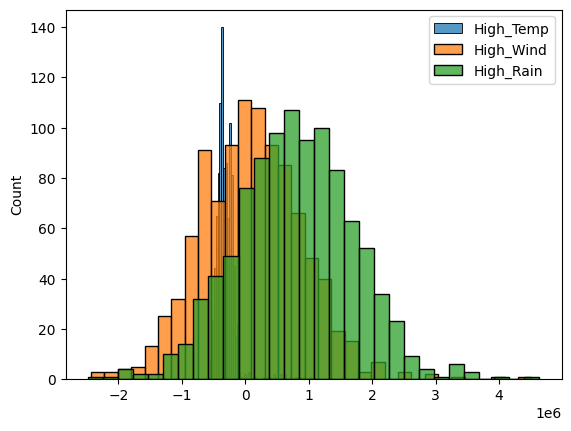

In [ ]:
ATE_bootstrap('High_Temp')
ATE_bootstrap('High_Wind')
ATE_bootstrap('High_Rain')
plt.legend()

In [ ]:
nj_unemp

,DATE,NJURN,Date,Year
0,2010-01-01,10.4,2010-01-01,2010
1,2010-02-01,10.4,2010-02-01,2010
2,2010-03-01,10.2,2010-03-01,2010
3,2010-04-01,9.6,2010-04-01,2010
4,2010-05-01,9.4,2010-05-01,2010
...,...,...,...,...
163,2023-08-01,4.9,2023-08-01,2023
164,2023-09-01,4.5,2023-09-01,2023
165,2023-10-01,4.5,2023-10-01,2023
166,2023-11-01,4.4,2023-11-01,2023


In [ ]:
CPI = pd.read_csv("CUURA101SEHA.csv")
CPI.head()

,DATE,CUURA101SEHA
0,2010-01-01,309.408
1,2010-02-01,309.841
2,2010-03-01,311.085
3,2010-04-01,311.378
4,2010-05-01,311.918


In [ ]:
shiller_index = pd.read_csv("CSUSHPINSA.csv")
shiller_index

,DATE,CSUSHPINSA
0,2010-01-01,145.003
1,2010-02-01,143.053
2,2010-03-01,143.596
3,2010-04-01,145.404
4,2010-05-01,147.040
...,...,...
163,2023-08-01,311.527
164,2023-09-01,312.398
165,2023-10-01,312.765
166,2023-11-01,311.921


In [ ]:
unemp_CPI = pd.merge(nj_unemp, CPI, how = "inner", left_on = "DATE", right_on = "DATE")
econ_indicators = pd.merge(shiller_index, unemp_CPI, how = "inner", left_on = "DATE", right_on = "DATE")
econ_indicators["Year-Month"] = econ_indicators['DATE'].str[:-3]

In [ ]:
elect_residential_nj

1,Year,Month,State,Data Status,Thousand Dollars,Megawatthours,Count,Cents/kWh,Season,Year-Month
33,2023,12,NJ,Preliminary,"402,447",2288286,"3,719,353",17.59,Winter,2023-12
84,2023,11,NJ,Preliminary,"342,440",1953211,"3,714,396",17.53,Fall,2023-11
135,2023,10,NJ,Preliminary,"328,766",1878707,"3,706,181",17.50,Fall,2023-10
186,2023,09,NJ,Preliminary,"466,944",2592379,"3,703,413",18.01,Fall,2023-09
237,2023,08,NJ,Preliminary,"606,648",3278331,"3,714,448",18.50,Summer,2023-08
...,...,...,...,...,...,...,...,...,...,...
8346,2010,05,NJ,Final,"336,138",2082045,"3,470,153",16.14,Spring,2010-05
8397,2010,04,NJ,Final,"286,591",1801444,"3,454,839",15.91,Spring,2010-04
8448,2010,03,NJ,Final,"326,187",2052907,"3,453,226",15.89,Spring,2010-03
8499,2010,02,NJ,Final,"353,691",2236726,"3,444,726",15.81,Winter,2010-02


In [ ]:
# final dataframe with electricity and economic indicators
econ_electricity = pd.merge(elect_residential_nj, econ_indicators, how = "inner", left_on = "Year-Month", right_on = 'Year-Month')
econ_electricity

,Year_x,Month,State,Data Status,Thousand Dollars,Megawatthours,Count,Cents/kWh,Season,Year-Month,DATE,CSUSHPINSA,NJURN,Date,Year_y,CUURA101SEHA
0,2023,12,NJ,Preliminary,"402,447",2288286,"3,719,353",17.59,Winter,2023-12,2023-12-01,310.714,4.5,2023-12-01,2023,452.537
1,2023,11,NJ,Preliminary,"342,440",1953211,"3,714,396",17.53,Fall,2023-11,2023-11-01,311.921,4.4,2023-11-01,2023,450.553
2,2023,10,NJ,Preliminary,"328,766",1878707,"3,706,181",17.50,Fall,2023-10,2023-10-01,312.765,4.5,2023-10-01,2023,449.583
3,2023,09,NJ,Preliminary,"466,944",2592379,"3,703,413",18.01,Fall,2023-09,2023-09-01,312.398,4.5,2023-09-01,2023,447.956
4,2023,08,NJ,Preliminary,"606,648",3278331,"3,714,448",18.50,Summer,2023-08,2023-08-01,311.527,4.9,2023-08-01,2023,445.377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,2010,05,NJ,Final,"336,138",2082045,"3,470,153",16.14,Spring,2010-05,2010-05-01,147.040,9.4,2010-05-01,2010,311.918
164,2010,04,NJ,Final,"286,591",1801444,"3,454,839",15.91,Spring,2010-04,2010-04-01,145.404,9.6,2010-04-01,2010,311.378
165,2010,03,NJ,Final,"326,187",2052907,"3,453,226",15.89,Spring,2010-03,2010-03-01,143.596,10.2,2010-03-01,2010,311.085
166,2010,02,NJ,Final,"353,691",2236726,"3,444,726",15.81,Winter,2010-02,2010-02-01,143.053,10.4,2010-02-01,2010,309.841


# GLM and Nonparametric Models

In [ ]:
from pymc import *
import pymc as pm
import bambi as bmb
from scipy.stats import poisson, norm, gamma

/root/venv/lib/python3.9/site-packages/_distutils_hack/__init__.py:11: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/root/venv/lib/python3.9/site-packages/_distutils_hack/__init__.py:26: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(econ_electricity[["CUURA101SEHA", "NJURN", "CSUSHPINSA"]], \
    econ_electricity["Megawatthours"], test_size=0.2, random_state=101)

#evaluating the rf model's predicting performance
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=101)
rf_regressor.fit(X_train, y_train)
y_pred = rf_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mse

620682876861.2551

In [ ]:
# evaluating the rf model's fitting performance
y_pred = rf_regressor.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
mse

47943233880.79148

In [ ]:
import statsmodels.api as sm

X = sm.add_constant(econ_electricity[['CSUSHPINSA', 'CUURA101SEHA', 'NJURN']])

glm_model = sm.GLM(np.log(econ_electricity['Megawatthours']), X, family=sm.families.Gaussian())
glm_results = glm_model.fit()

print(glm_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:          Megawatthours   No. Observations:                  168
Model:                            GLM   Df Residuals:                      164
Model Family:                Gaussian   Df Model:                            3
Link Function:               Identity   Scale:                        0.058612
Method:                          IRLS   Log-Likelihood:                 1.9350
Date:                Tue, 07 May 2024   Deviance:                       9.6124
Time:                        01:05:32   Pearson chi2:                     9.61
No. Iterations:                     3   Pseudo R-squ. (CS):            0.04316
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           14.5168      0.400     36.306   

In [ ]:
# evaluating the glm model's predicting performance

X = sm.add_constant(X_train)

glm_model = sm.GLM(np.log(y_train), X, family=sm.families.Gaussian())
glm_results = glm_model.fit()

X_test_glm = sm.add_constant(X_test)
y_glm_pred = glm_results.predict(X_test_glm)
glm_mse = mean_squared_error(y_test, np.exp(y_glm_pred))
glm_mse

503205920994.9187

In [ ]:
# evaluating the glm model's fitting performance

X = sm.add_constant(X_train)

glm_model = sm.GLM(np.log(y_train), X, family=sm.families.Gaussian())
glm_results = glm_model.fit()

X_train_glm = sm.add_constant(X_train)
y_glm_pred = glm_results.predict(X_train_glm)
glm_mse = mean_squared_error(y_train, np.exp(y_glm_pred))
glm_mse

385071120771.1019

In [ ]:
econ_electricity['log_Megawatthours'] = np.log(econ_electricity['Megawatthours'])

In [ ]:
log_norm_model = bmb.Model(formula='log_Megawatthours ~ CUURA101SEHA + CSUSHPINSA + NJURN', data=econ_electricity, \
    family='gaussian')
log_norm_trace = log_norm_model.fit(random_seed=101)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [log_Megawatthours_sigma, Intercept, CUURA101SEHA, CSUSHPINSA, NJURN]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 17 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,14.524,0.396,13.804,15.280,0.011,0.008,1254.0,1266.0,1.0
CUURA101SEHA,-0.001,0.001,-0.003,0.002,0.000,0.000,1243.0,1136.0,1.0
CSUSHPINSA,0.001,0.001,-0.001,0.003,0.000,0.000,1326.0,1201.0,1.0
NJURN,0.021,0.009,0.005,0.038,0.000,0.000,1672.0,1500.0,1.0
log_Megawatthours_sigma,0.243,0.014,0.217,0.269,0.000,0.000,1593.0,1118.0,1.0


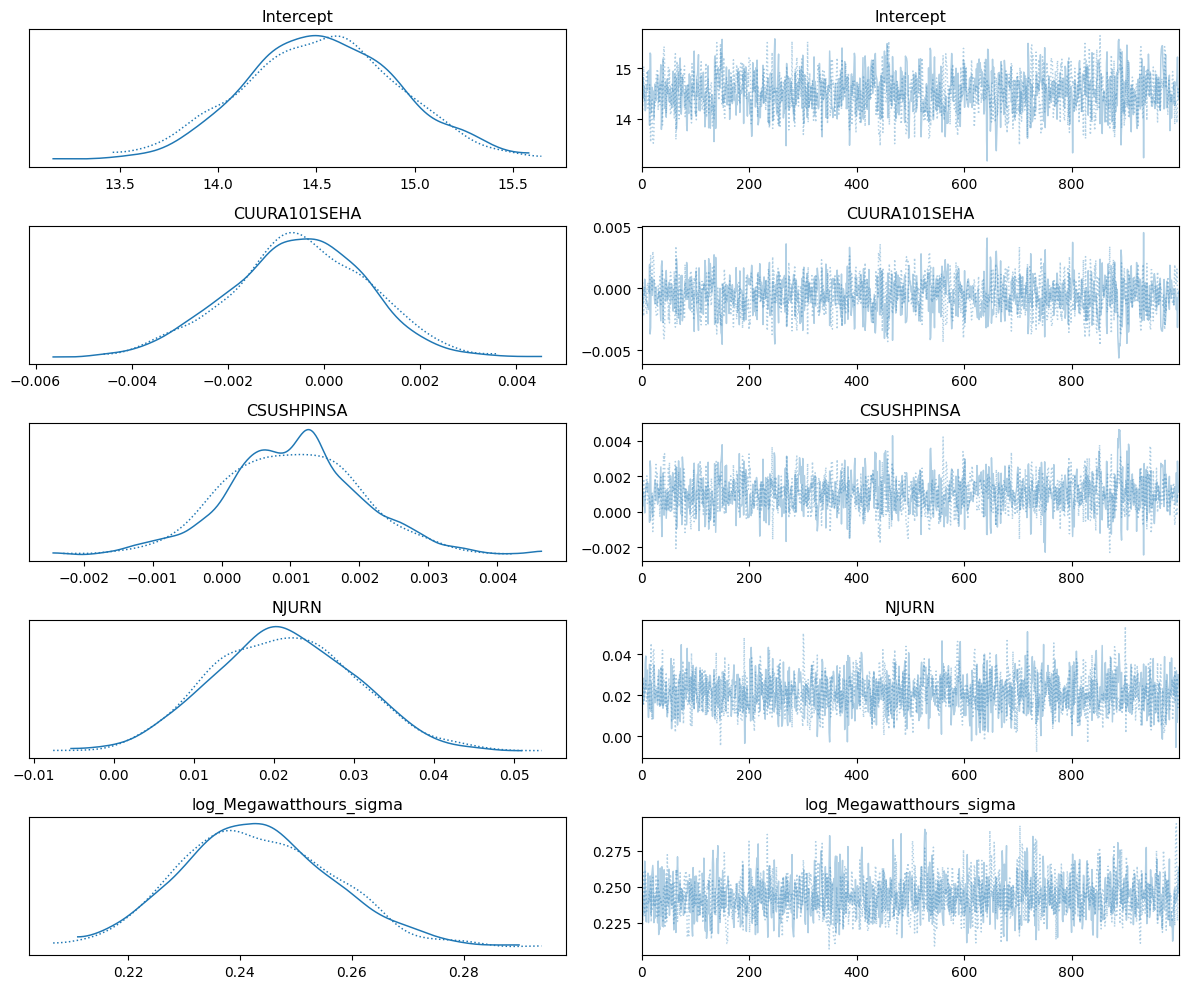

In [ ]:
import arviz as az
az.plot_trace(log_norm_trace)
plt.tight_layout()
az.summary(log_norm_trace)

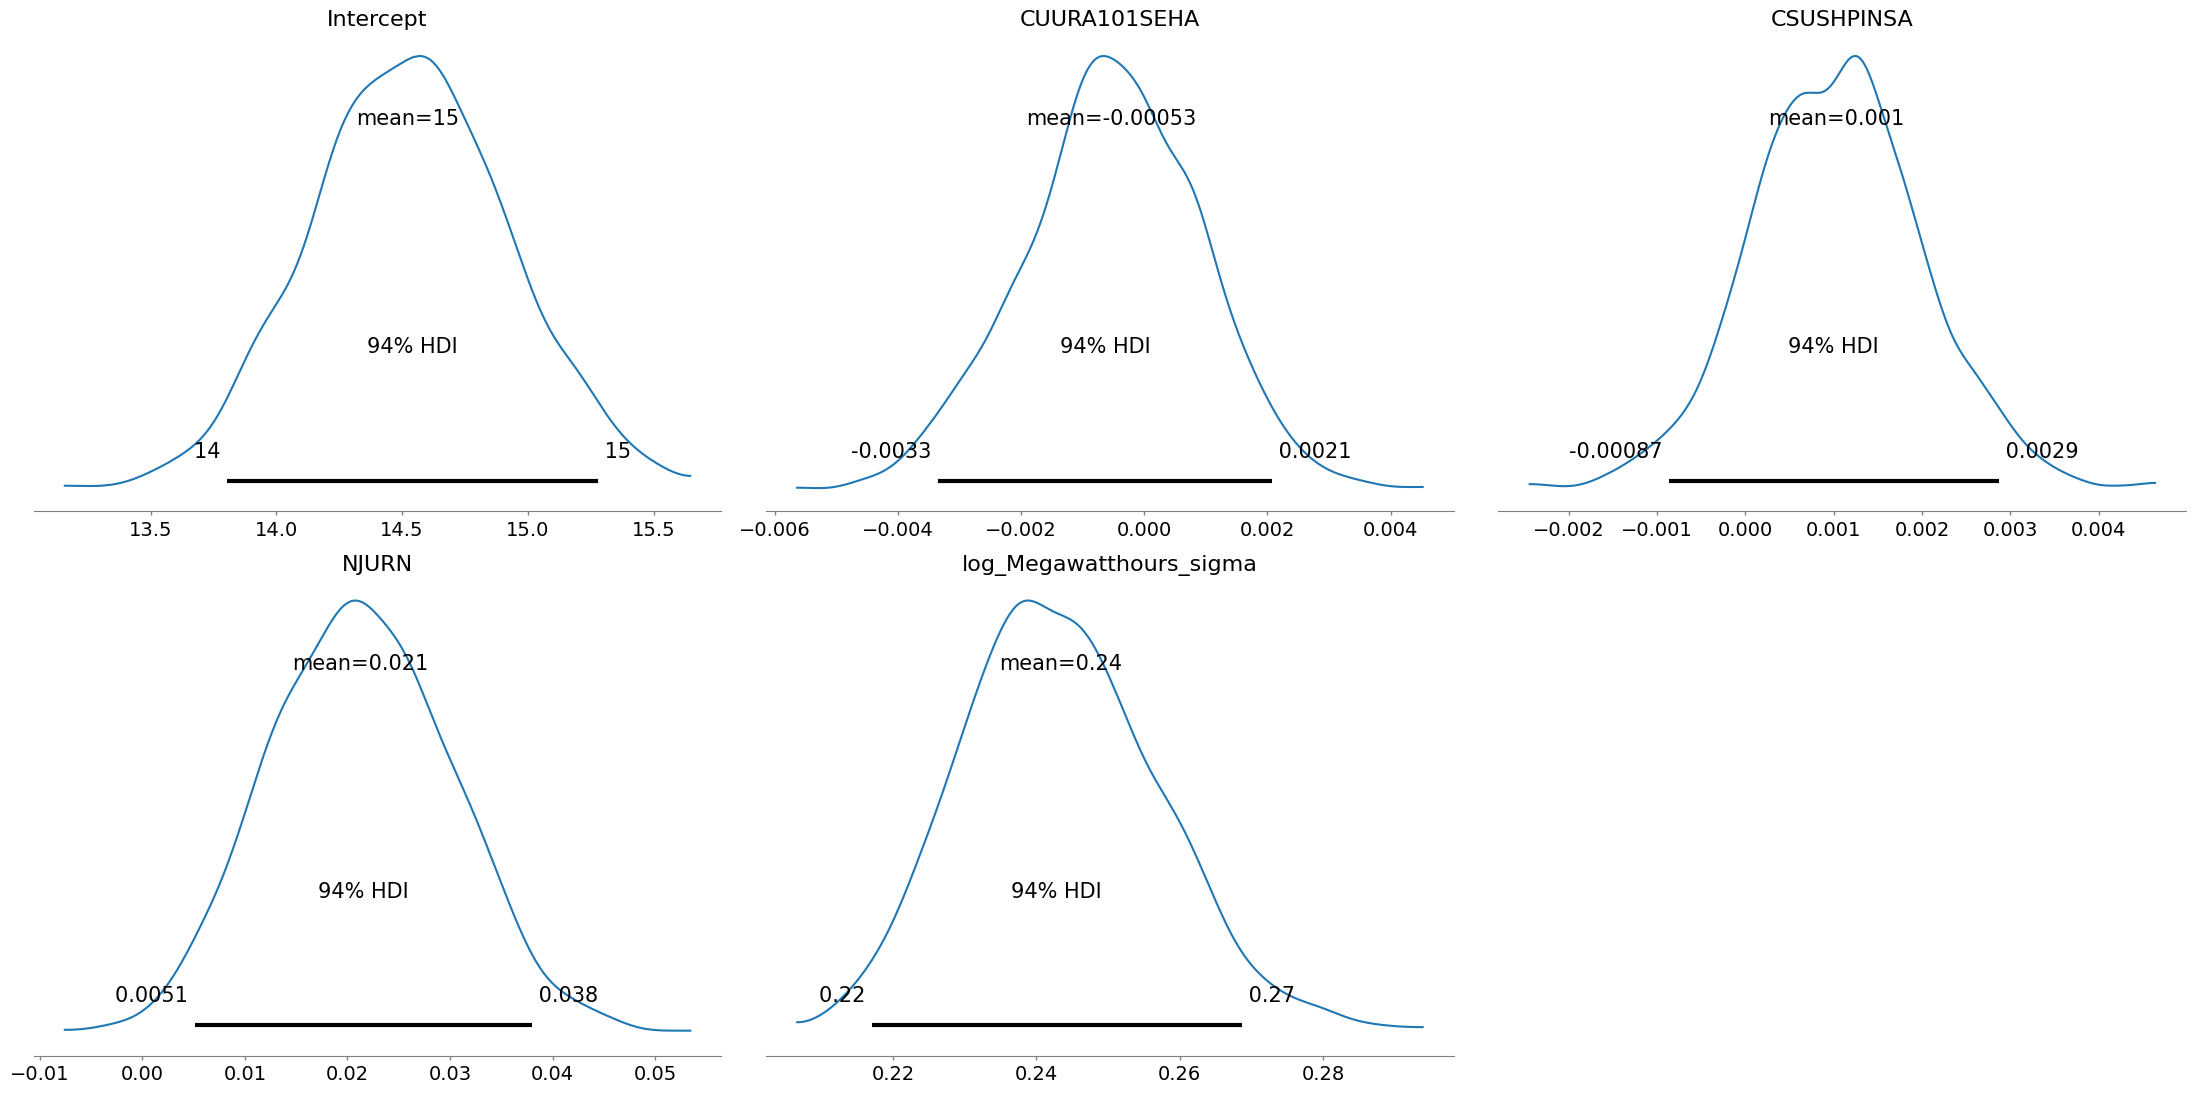

In [ ]:
az.plot_posterior(log_norm_trace)
plt.tight_layout()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6f95feb0-6167-48d5-bc88-b4ae1195a781' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>